# **RBOT 240 - Week 7 Exercises**

Complete 3 of the following exercises.

---

# <font color="blue">My selected three questions are:</font>
<font color="blue">- <b>Exercise PRML 9.14</b></font>

<font color="blue">- <b>Exercise D1</b></font>

<font color="blue">- <b>Exercise P1</b></font>

---

## Problem Exercises

The problem exercises are based off the PRML suplemental reading.  You'll need to read the chapter 9 to do the exercises.

**(PRML 9.9)** Show that if we maximize (9.40) with respect to $\Sigma_k$ and $\pi_k$ while keeping the responsibilities $\gamma(z_{nk})$ fixed, we obtain the closed form solutions given by (9.19) and (9.22).

**(PRML 9.11)** In Section 9.3.2, we obtained a relationship between K-means and EM for Gaussian mixtures by considering a mixture model in which all componenets have covariance $\epsilon \textbf{I}$.  Show that in the limit $\epsilon \rightarrow 0$, maximizing the expected complete data log likelihood for this model, given by (9.40), is equivalent to minimizing the distortion measure $J$ for the K-means algorithm given by (9.1)

**<font color="blue">(PRML 9.14)** Consider the joint distribution of latent and observed variables for the Bernoulli distribtuion obtained by forming the product of $p(\textbf{x}|\textbf{z},\mu)$ given by (9.52) and $p(\textbf{z}|\pi)$ given by (9.53).  Show that if we marginalize this joint distibution with respect to x, then we obtain (9.47).</font>

<font color="green"><u><b>Answer</b></u></font>

We're given below equation in the question (based on Bishop's textbook):

$
\begin{align}
\mathbf{p(x|z,μ)} = \prod_{k=1}^{K} p(X|\mu_{k})^{z_{k}}
\tag*{(9.52)}
\end{align}
$

$
\begin{align}
\mathbf{p(z|\pi)} = \prod_{k=1}^{K} \pi{k}^{z_{k}}
\tag*{(9.53)}
\end{align}
$

We need to show that if we marginalize this joint distibution with respect to x, we can obtain the following:

$
\begin{align}
\mathbf{p(x|\mu, \pi)} = \sum_{k=1}^{K} \pi_{k}p(x|\mu_{k})
\tag*{(9.47)}
\end{align}
$

Let's perform the product of equations **(9.52)** and **(9.53)**:

\begin{equation}
\begin{aligned}
\mathbf{p(x, z|\mu, \pi)} &= p(x|z,\mu) \cdot p(z|\pi) \\
  & = \prod_{k=1}^{K} p(X|\mu_{k})^{z_{k}} \cdot \prod_{k=1}^{K} \pi{k}^{z_{k}} \\
  & = \prod_{k=1}^{K} \big[ \pi_{k}p(x | \mu_{k}) \big]^{z{k}}
\end{aligned}
\end{equation}

Then, we marginalized over $z$, result in:

\begin{equation}
\begin{aligned}
\mathbf{p(x|\mu)} &= \sum_{z} p(x, z|\mu, \pi)\\
& = \sum_{k} \prod_{k=1}^{K} \big[ \pi_{k}p(x|\mu{k})\big]^{z{k}} \\
& = \prod_{k=1}^{K} \big[ \pi_{k}p(x | \mu_{k}) \big]^{z{k}} \biggm\lvert_{z_{1}=1} + ... + \prod_{k=1}^{K} \big[ \pi_{k}p(x | \mu_{k}) \big]^{z{k}} \biggm\lvert_{z_{K}=1} \\
& = \pi_{1} p(x | \mu_{1}) + ... + \pi_{K} p(x | \mu_{K}) \\
& = \sum_{k=1}^{K} \pi_{k}p(x|\mu_{k})
\end{aligned}
\end{equation}

To elaborate the above proof, the summation over $z$ is made up of $K$ terms and the $k$-$th$ term corresponds to $z_{k} = 1$ and other $z_{j}$, where $ j \neq k$, equals $0$. 

Therefore, the $k$-$th$ term will reduce to $\pi_{k}p(x|\mu_{k})$ which is equal to **(9.47)**.



## Discussion Exercises

**<font color="blue">(Exercise D1)** The models we looked this week require knowing the number of clusters ahead of time.  What might you do if you don't know the number of clusters.  Investigation possible solutions.</font>

<font color="green"><u><b>Answer</b></u></font>

The correct choice of **number of clusters** is often ambiguous, with interpretations depending on the shape and scale of the distribution of points in a data set and the desired clustering resolution of the user. There are several possible soultions for making this decision:[1]

1. The elbow method
2. X-means clustering
3. Information criterion approach
4. An information–theoretic approach
5. The silhouette method
6. Cross-validation
7. Finding number of clusters in text databases
8. Analyzing the kernel matrix

In this assignment, I'd like to put my focus on the **elbow method** since I learned about this method when I took the data science certificate program. (Basicly, I'm most familiar with this method).

##### <u><b>Elbow method</b></u>

The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.[2]

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE). Like this:


```
var sse = {};
for (var k = 1; k <= maxK; ++k) {
    sse[k] = 0;
    clusters = kmeans(dataset, k);
    clusters.forEach(function(cluster) {
        mean = clusterMean(cluster);
        cluster.forEach(function(datapoint) {
            sse[k] += Math.pow(datapoint - mean, 2);
        });
    });
}
```

Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. 

Please look at the following picture to see how the elbow's plot will look like:
<image src="https://media.geeksforgeeks.org/wp-content/uploads/20190606105746/inertia.png" />

Why we pick the number **<i>k</i>**? (This is case, it's number **3** in the plot). In the simple word, we pick **3** becuase adding another cluster doesn’t give much better modeling of the data. If we look at the plot, we can see that increasing the number of clusters more than **3** won't decrease much of **sum of squared errors**.

Note: this method has the similar concept with **distortion function** in the assignment 4.


[1] https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set

[2] https://en.wikipedia.org/wiki/Elbow_method_(clustering)

**(Exercise D2)** Describe the strengths and weaknesses of the K-means clustering.  Describe the strengths and weaknesses of the GMM model.  When would you choose a GMM over K-means?  When would you choose K-means over a GMM?

**(Exercise D3)** Will K-means always converge?  Will it converge to the optimal solution?  What about the GMM?  Justify your answer.

**(Exercise D4)** Is the Gaussian Mixture Model a member of the Exponential Family?  Why or why not?

## Programming Exercises
The assignments are based on the first part of assignment 4.  To do the programming exercises, you'll need to get an early start on the assignment.

**<font color="blue">(Exercise P1)** In assignment 4, we look at the implementation of the k-means clustering algorithm.  Implement the distortion function from the reading material and plot the value over time for many runs for random starting clusters.  Does it always converge?  Does it always monotonicaly decrease?</font>    

<font color="green"><u><b>Answer</b></u></font>

*   **Does it always converge?**

    <font color="green"><b>Answer:</b></font> The algorithm always converges (by-definition) but not necessarily to global optimum.

*   **Does it always monotonicaly decrease?**

    <font color="green"><b>Answer:</b></font>
 
    the **distort funtion** always monotonicaly decrease.

Below is my implementation.


Distortions Size
10
Distortions Numpy Array
668.2369210599848
186.36588819536087
186.36588819536087
186.36588819536087
186.36588819536087
186.36588819536087
186.36588819536087
186.36588819536087
186.36588819536087
186.36588819536087


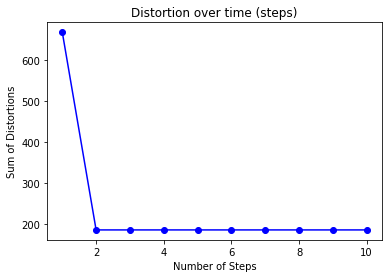

In [13]:
################################################
####### Place your implementation here #########
################################################

from sklearn import cluster, datasets
import numpy as np
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)

X, y = datasets.make_blobs(n_samples=100, random_state=10)
X = torch.tensor(X).float()

cluster_means = torch.randn(3,2)

# Array to hold the distortion numbers for each iteration
distortions = []

for step in range(10):
  pairwise_distance = torch.cdist(X, cluster_means, compute_mode='use_mm_for_euclid_dist_if_necessary')
  cluster_indicator = torch.min(pairwise_distance, 1).indices

  cluster_means = [X[cluster_indicator == i].mean(0) for i in range(len(cluster_indicator))]
  cluster_means = torch.stack(cluster_means)
  cluster_means = cluster_means[~torch.any(cluster_means.isnan(),dim=1)]

  square_error_list = []
  for i in range(len(cluster_indicator)):
    cluster_np = X[cluster_indicator == i].numpy()
    if cluster_np.size > 0:
      mean = cluster_np.mean(0)
      square_error = np.linalg.norm(cluster_np - mean)**2 # squared of distance between the each point and it's centroid
      square_error_list.append(square_error) # append to list of squared errors for this cluster
  sum_square_error = np.sum(square_error_list) # sum all squared errors for this cluster (return scalar)
  distortions.append(sum_square_error) # append the sse number to the list of distortions for each iterations (Total number is 10)

print('\033[34m' + '\033[1m' + 'Distortions Size' + '\033[0m')
print(len(distortions))
print('\033[34m' + '\033[1m' + 'Distortions Numpy Array' + '\033[0m')
print('\n'.join(str(x) for x in distortions))

# plot
plt.plot(range(1, len(distortions)+1), distortions, color='b', marker='o')
plt.xlabel('Number of Steps')
plt.ylabel('Sum of Distortions')
plt.title('Distortion over time (steps)')
plt.show()

**(Exercise P2)** In assignment 4, we look at the implementation of the k-means clustering algorithm.  Try running the algorithm many times with random starting clusters and plot a histogram of the distortion function values.  Do you see evidence that it sometimes doesn't converge to the optimum value?

In [ ]:
################################################
####### Place your implementation here #########
################################################